## Dataset Information


Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

```
Boston Housing Dataset Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
```

## Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm

## Loading the dataset

In [2]:
df = pd.read_csv('C:/Users/DELL/HousingData - Copy (2).csv')
#df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
#df.drop(columns='black', axis=0, inplace=True)
#df.head()

In [3]:
# statistical info
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,2.515621,11.894509,10.383179,0.063584,0.540537,6.236332,66.503179,4.020475,8.167630,385.118497,18.487861,366.232225,12.203931,22.332370
std,6.765813,23.771338,6.838145,0.244363,0.109309,0.624222,27.766969,2.110008,7.830871,156.644230,2.116279,77.893469,6.780804,7.364041
min,0.006320,0.000000,0.740000,0.000000,0.389000,4.138000,2.900000,1.137000,1.000000,187.000000,12.600000,2.600000,1.980000,7.000000
25%,0.071848,0.000000,4.935000,0.000000,0.448000,5.872000,42.300000,2.297950,4.000000,277.000000,17.400000,378.275000,6.982500,18.125000
50%,0.206770,0.000000,8.140000,0.000000,0.520000,6.163500,72.400000,3.539200,5.000000,309.000000,18.950000,392.800000,10.585000,21.400000
75%,1.246960,19.500000,18.100000,0.000000,0.603000,6.566500,92.125000,5.372350,7.000000,432.000000,20.200000,396.900000,15.662500,24.800000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.337000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,46.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     346 non-null    float64
 1   zn       346 non-null    float64
 2   indus    346 non-null    float64
 3   chas     346 non-null    int64  
 4   nox      346 non-null    float64
 5   rm       346 non-null    float64
 6   age      346 non-null    float64
 7   dis      346 non-null    float64
 8   rad      346 non-null    int64  
 9   tax      346 non-null    int64  
 10  ptratio  346 non-null    float64
 11  b        346 non-null    float64
 12  lstat    346 non-null    float64
 13  medv     346 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.0 KB


## Preprocessing the dataset

In [5]:
# check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Exploratory Data Analysis

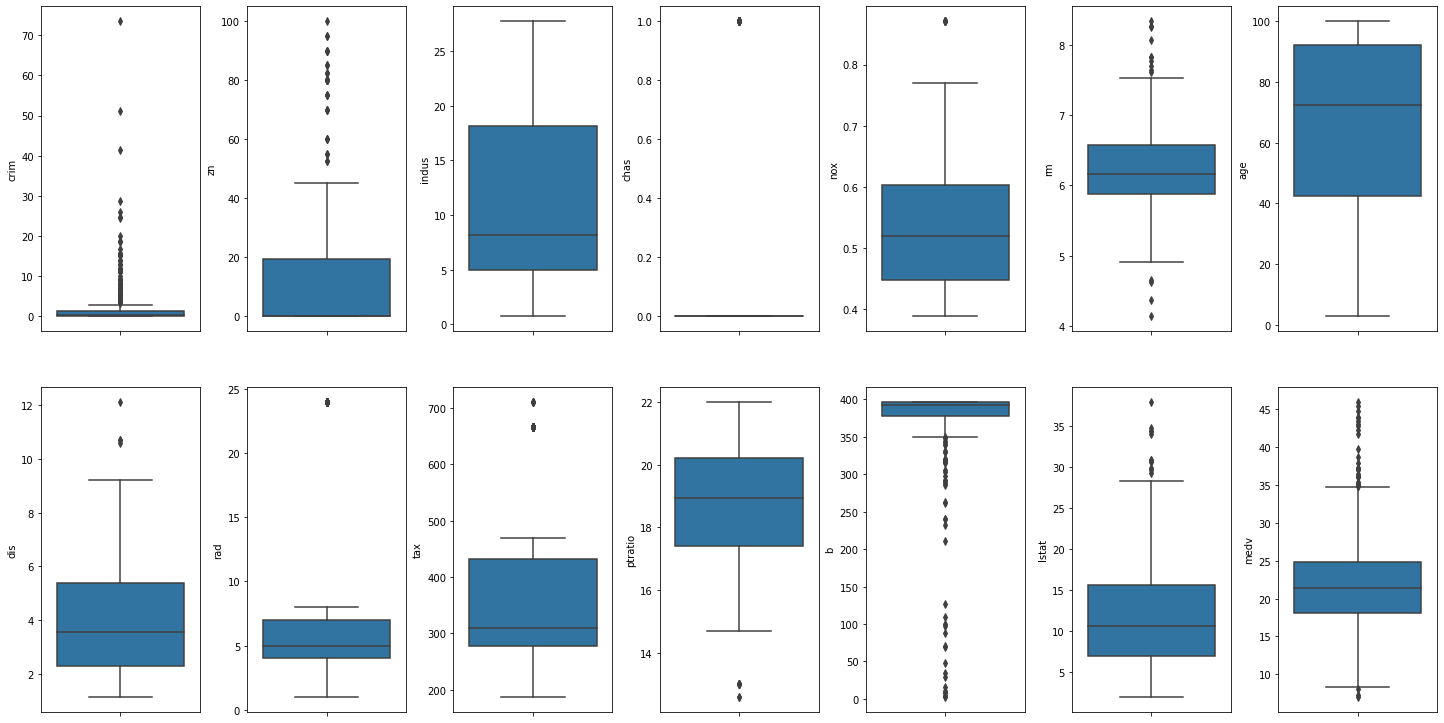

In [6]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

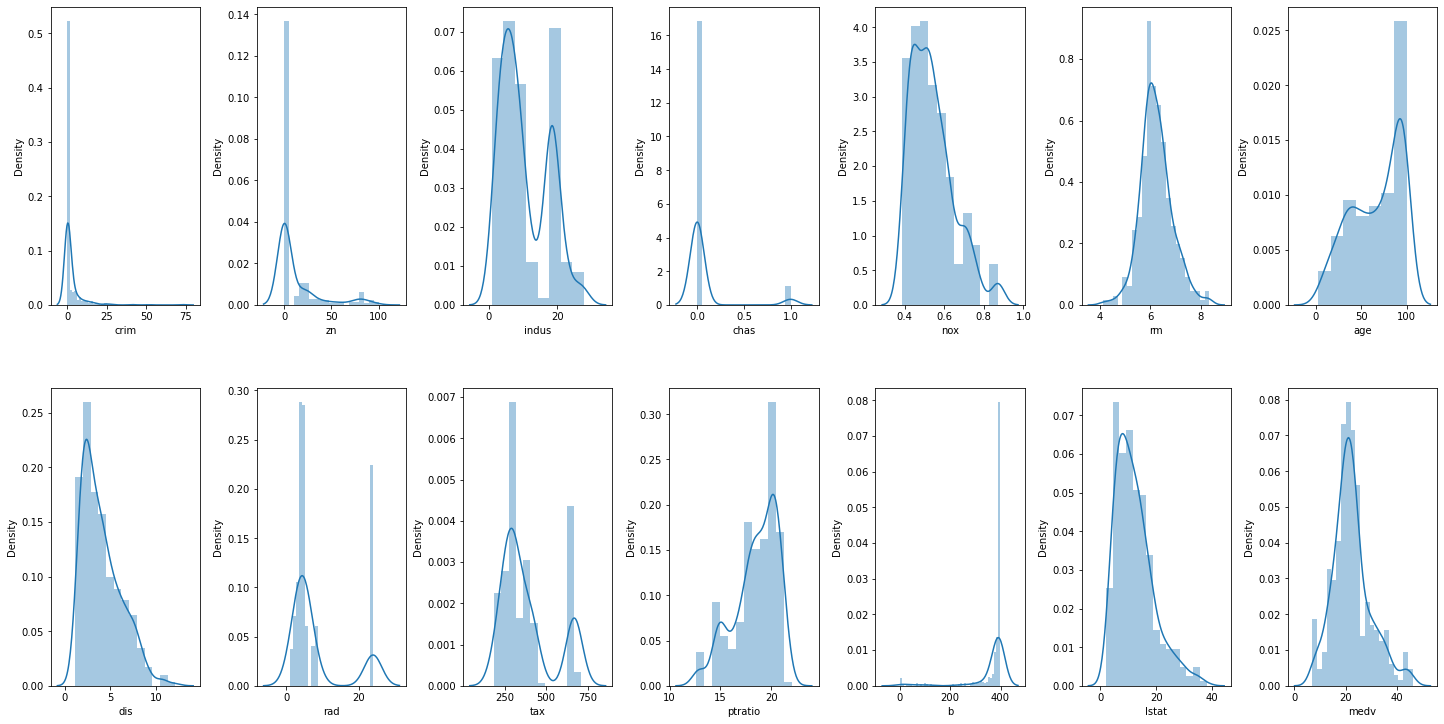

In [7]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-Max Normalization

In [8]:
cols = ['crim', 'zn', 'tax']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

In [9]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax
0,-0.287200,-0.501097,-0.499422
1,-0.325678,-0.501097,-0.499422
2,-0.317743,0.425728,-0.352380
3,-0.354467,-0.501097,-0.697610
4,-0.360234,-0.501097,-0.697610


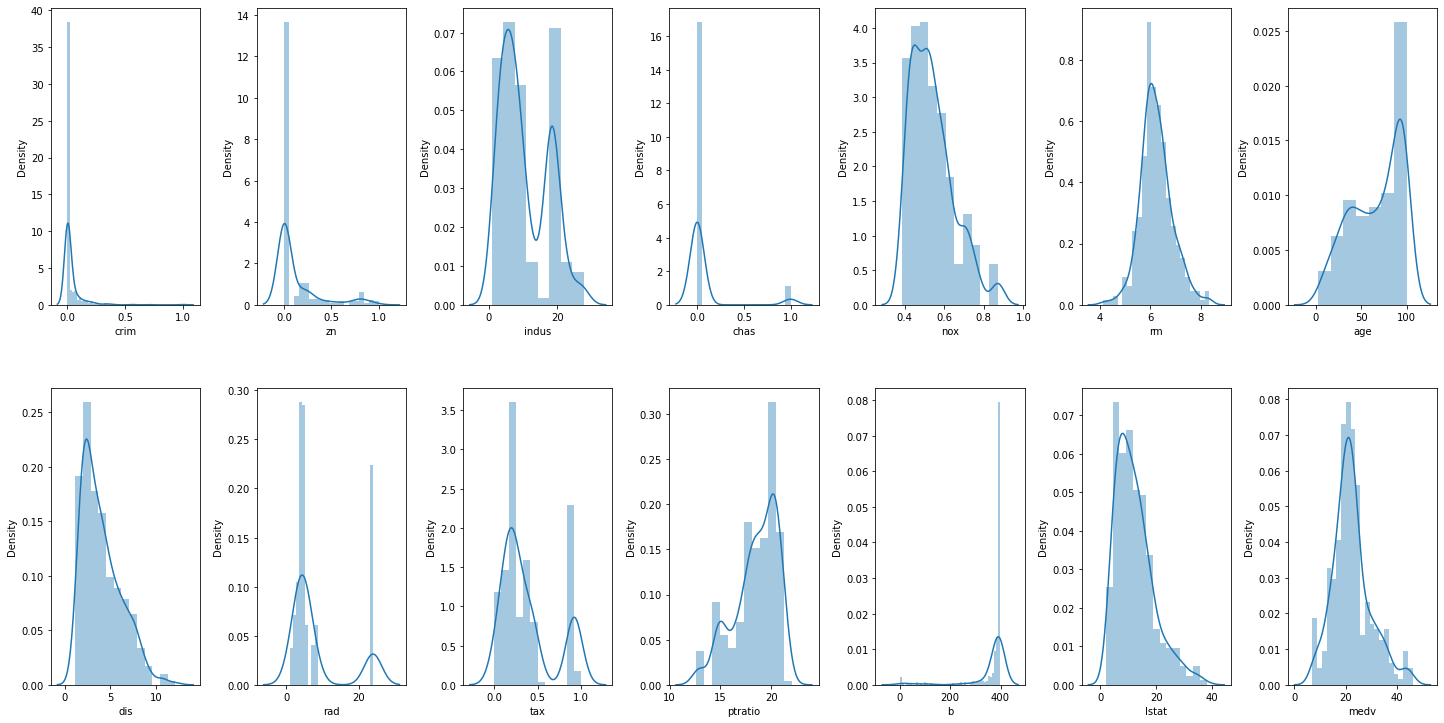

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [11]:
for col in cols:
    df[col] = scaled_cols[col]

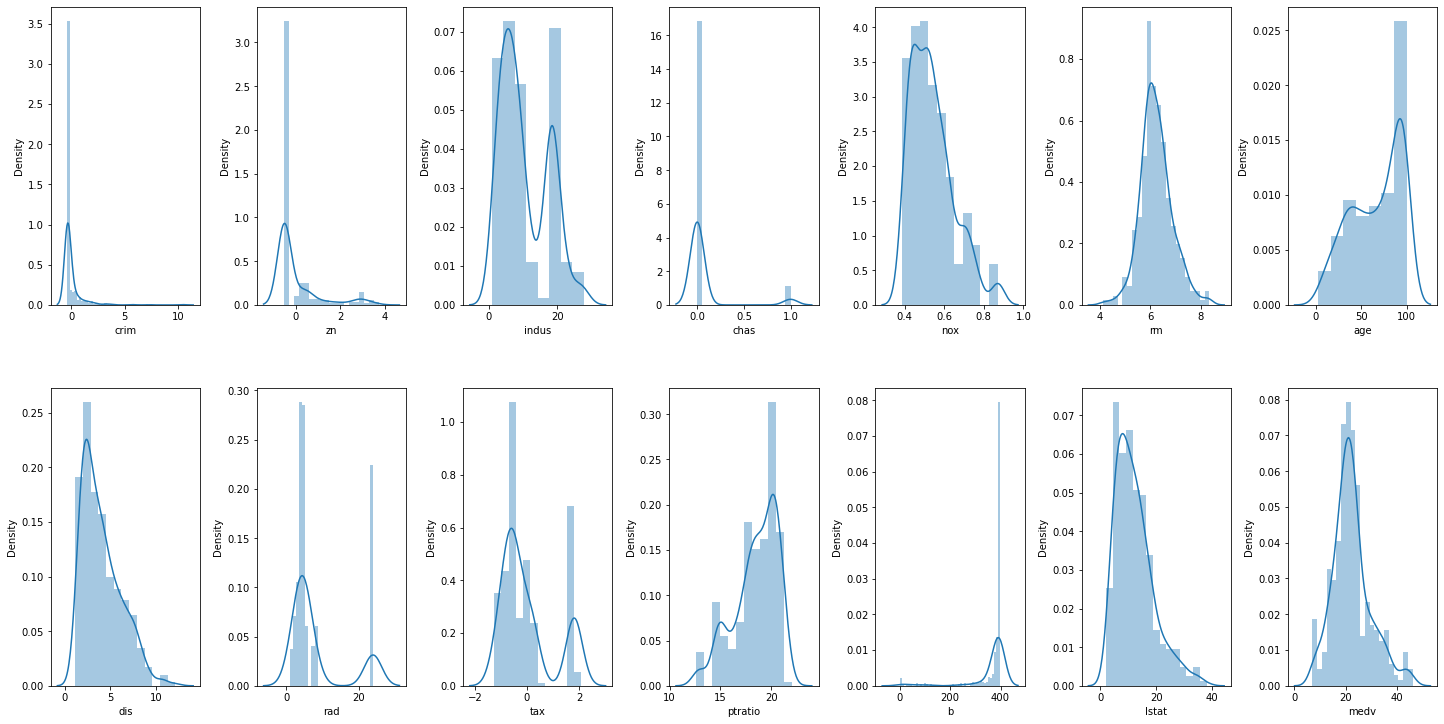

In [12]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Coorelation Matrix



<AxesSubplot:>

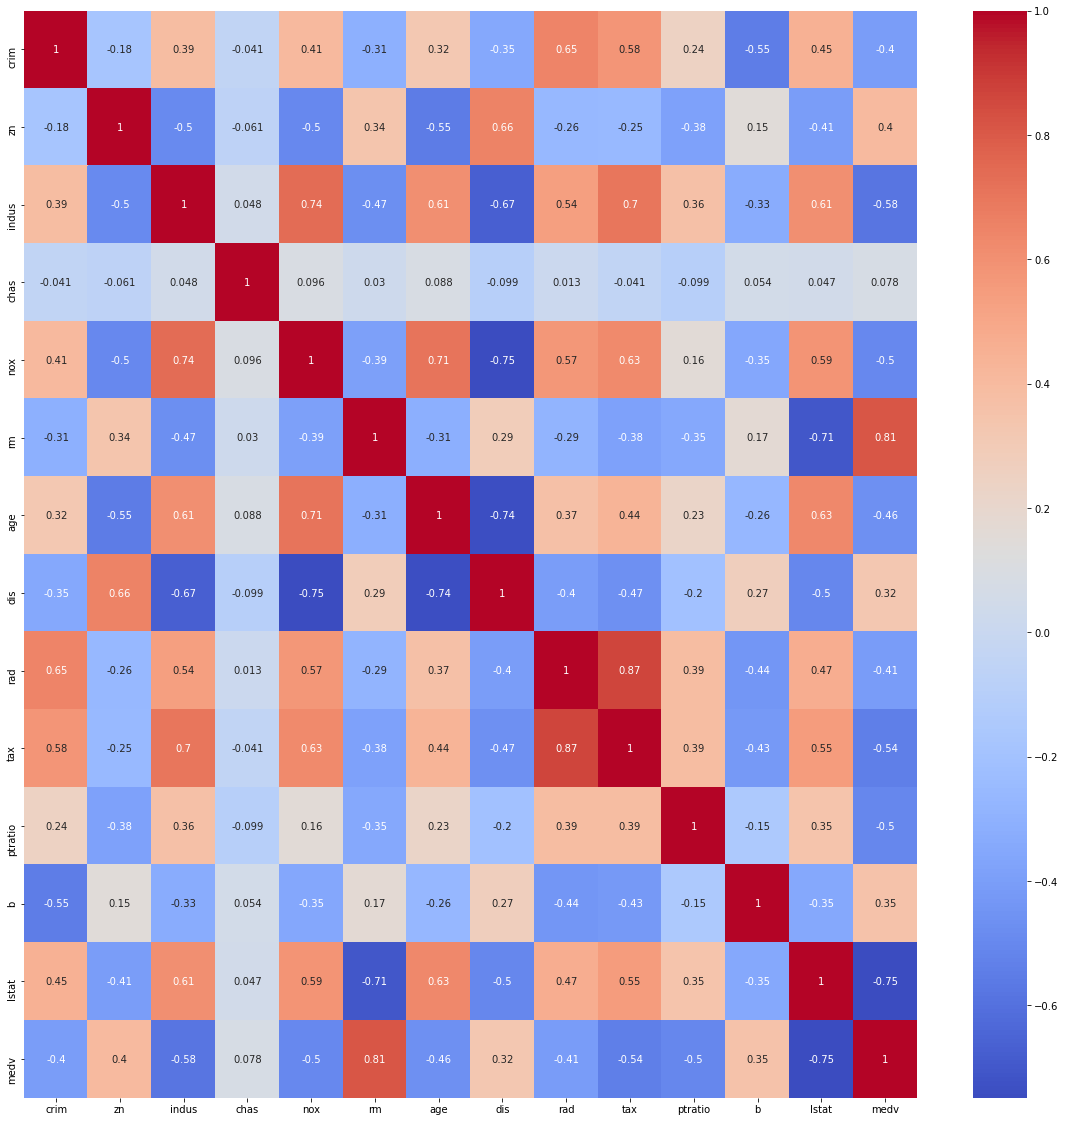

In [13]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [14]:
np.cov(df['rm'],df['medv'])

array([[ 0.38965265,  3.73363124],
       [ 3.73363124, 54.22909408]])

In [15]:
np.var(df[['rm']])

rm    0.388526
dtype: float64

## Building Regression Model and checking R-squared value

In [16]:
reg = linear_model.LinearRegression()
obj = reg.fit(df[['rm']],df['medv'])
trendline = reg.predict(df[['rm']])
r_squared = r2_score(df['medv'],trendline)
print(r_squared)


0.659709682009753


In [17]:
X,y = df[['rm']],df['medv']
model = sm.OLS(y, X).fit()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.rsquared)
model.summary()

0.6597096820097532


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     666.9
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.59e-82
Time:                        02:01:45   Log-Likelihood:                -994.79
No. Observations:                 346   AIC:                             1994.
Df Residuals:                     344   BIC:                             2001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4238      2.325    -16.093      0.000     -41.998     -32.850
rm             9.5819      0.371     25.824      0.000       8.852      10.312
==============================================================================
Omnibus:                       20.998   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.887
Skew:                          -0.301   Prob(JB):                     1.79e-10
Kurtosis:                       4.659   Cond. No.                         64.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
obj1 = reg.fit(df[['lstat']],df['medv'])
trendline = reg.predict(df[['lstat']])
r_squared = r2_score(df['medv'],trendline)
print(r_squared)

0.5585191138380652


In [19]:
obj2 = reg.fit(df[['ptratio']],df['medv'])
trendline = reg.predict(df[['ptratio']])
r_squared = r2_score(df['medv'],trendline)
print(r_squared)

0.2546867439901602


In [20]:
obj3 = reg.fit(df[['dis']],df['medv'])
trendline = reg.predict(df[['dis']])
r_squared = r2_score(df['medv'],trendline)
print(r_squared)

0.10486699437474234


In [21]:
reg = linear_model.LinearRegression()
reg.fit(df[['ptratio']],df['medv'])
reg.intercept_


54.79869945948356

In [22]:
reg.intercept_

54.79869945948356

In [23]:
reg1 = linear_model.LinearRegression()
reg1.fit(df[['rm','lstat','ptratio']],df['medv'])
reg1.intercept_

1.928888987093174

In [24]:
reg1 = linear_model.LinearRegression()
reg1.fit(df[['rm','lstat','ptratio','nox','dis','crim','tax','indus','age','zn','chas']],df['medv'])
reg1.coef_

array([ 6.11996942, -0.17649847, -0.5906457 , -8.69252526, -1.06110764,
       -0.26776297, -0.56358206, -0.09020265, -0.04193094,  0.5533332 ,
        1.60474516])

In [25]:
X, y = df[['rm','lstat','ptratio']],df['medv']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.rsquared_adj)
model.summary()

0.7587966329105631


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     362.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          7.08e-106
Time:                        02:01:45   Log-Likelihood:                -933.74
No. Observations:                 346   AIC:                             1875.
Df Residuals:                     342   BIC:                             1891.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9289      3.814      0.506      0.613      -5.573       9.430
rm             6.1635      0.446     13.829      0.000       5.287       7.040
lstat         -0.3293      0.041     -8.031      0.000      -0.410      -0.249
ptratio       -0.7581      0.099     -7.635      0.000      -0.953      -0.563
==============================================================================
Omnibus:                       33.878   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.589
Skew:                           0.566   Prob(JB):                     1.56e-14
Kurtosis:                       4.769   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
reg1.intercept_

9.827839011325526

## Scatter Plot and Regression Line

32.23735251082229

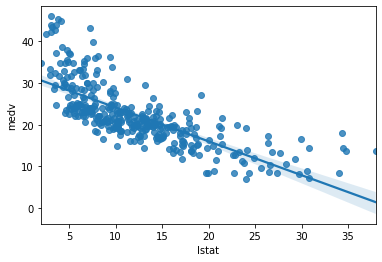

In [27]:
sns.regplot(y=df['medv'], x=df['lstat'])
reg1.fit(df[['lstat']],df['medv'])
reg1.intercept_

<AxesSubplot:xlabel='age', ylabel='medv'>

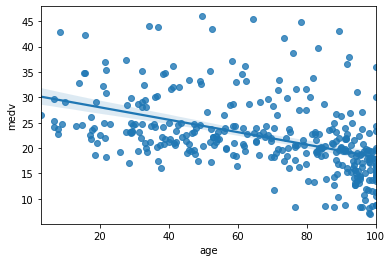

In [28]:
sns.regplot(y=df['medv'], x=df['age'])

array([9.58194747])

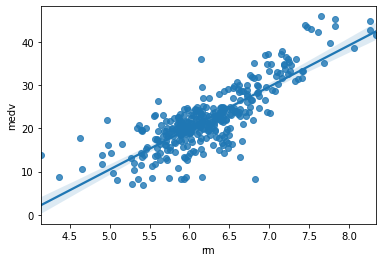

In [29]:
sns.regplot(y=df['medv'], x=df['rm'])
reg1.fit(df[['rm']],df['medv'])
reg1.coef_


array([-1.75608898])

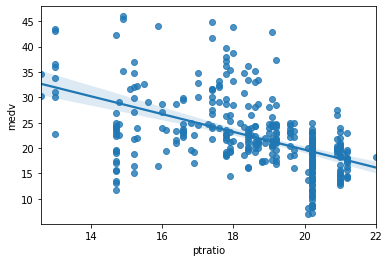

In [30]:
sns.regplot(y=df['medv'], x=df['ptratio'])
reg1.fit(df[['ptratio']],df['medv'])
reg1.coef_

<AxesSubplot:xlabel='dis', ylabel='medv'>

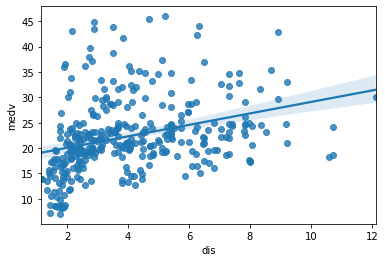

In [31]:
sns.regplot(y=df['medv'], x=df['dis'])

## Input Split  & removing one multicollinear variable

In [32]:
X = df.drop(columns=['medv', 'rad'], axis=1)
y = df['medv']

## Model Training

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)

CV Score: 22.337293205870576


In [35]:
y_pred = model.predict(X_train)
def performance_metric(y_train, y_pred):
    score = r2_score(y_train, y_pred)
    print(score)
performance_metric(y_train, y_pred)

0.817107341788259


In [36]:
print("Training Accuracy:",model.score(X_train,y_train)*100)


Training Accuracy: 81.71073417882589


In [37]:
print("Testing Accuracy:",model.score(X_test,y_test)*100)


Testing Accuracy: 79.24537734030595


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Model Accuracy: 80.71338522199608


nox       -7.966793
dis       -1.125450
ptratio   -0.561830
tax       -0.385205
lstat     -0.119485
crim      -0.056332
age       -0.052626
indus     -0.048642
b          0.015074
zn         0.601184
chas       1.910790
rm         6.549033
dtype: float64


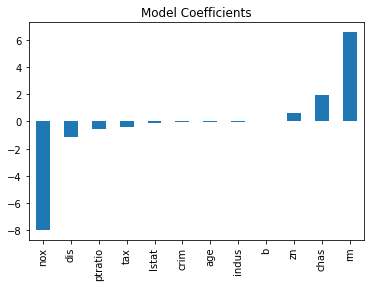

In [40]:
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    model = LinearRegression(normalize=True)
train(model, X, y)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
print(coef)


In [41]:
## VISUALISATION


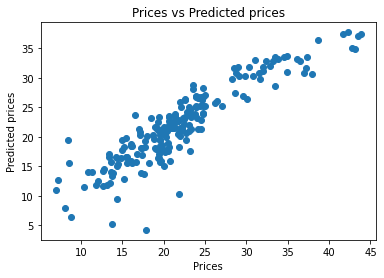

In [42]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

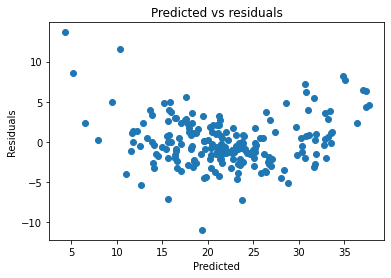

In [43]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

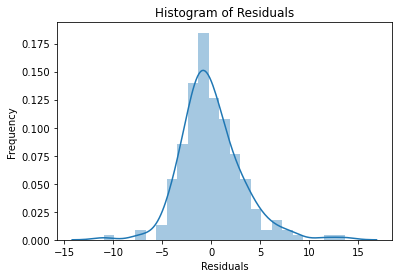

In [44]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()